In [19]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)

import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px

In [20]:

TagDesc = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\1 - EF - CSV Inputs\TagDesc.csv")
# df_CDCO = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")
df_CDCO = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDFI.csv")


FScore = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\FScore_on_Butanol_310.csv")

# df_CDCO = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')

# Check Basic Information:

In [21]:


df_CDCO.info() #to check the data types, non-null counts, and memory usage.
df_CDCO.head() #to examine the first few rows of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56692 entries, 0 to 56691
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Butanol   56692 non-null  float64
 1   425 %Al   56692 non-null  float64
 2   DI55102   56692 non-null  float64
 3   DI55152   56692 non-null  float64
 4   TC55552   56692 non-null  float64
 5   FC55569   56692 non-null  float64
 6   AYC55580  56692 non-null  float64
 7   FC55576   56692 non-null  float64
 8   FC42428   56692 non-null  float64
 9   FC55003   56692 non-null  float64
 10  DI55580   56692 non-null  float64
 11  FFC55553  56692 non-null  float64
 12  FC55009   56692 non-null  float64
 13  TI55023   56692 non-null  float64
 14  LC55557   56692 non-null  float64
 15  LC55555   56692 non-null  float64
 16  TI55017   56692 non-null  float64
 17  LC55553   56692 non-null  float64
 18  FC55555   56692 non-null  float64
 19  TI55021   56692 non-null  float64
 20  FC55102   56692 non-null  fl

,Butanol,425 %Al,DI55102,DI55152,TC55552,FC55569,AYC55580,FC55576,FC42428,FC55003,DI55580,FFC55553,FC55009,TI55023,LC55557,LC55555,TI55017,LC55553,FC55555,TI55021,FC55102,FFC55555,FYC55553,FC55552,TC55553,FC55152,TC55555,TI55013,LC55568,TI55014,TI55015,TI55016,Date,Decanol
0,58.5265,6.30693,0.969806,0.924181,177.188,6912.68,18.2020,341.221,39317.7,5017.59,1.01691,1.000020,1518.05,211.484,65.8159,59.9547,205.694,62.1299,31160.5,213.032,54720.8,0.750930,41313.6,41388.8,231.718,51377.3,180.140,234.999,39.6806,222.832,216.755,207.387,2012-05-16 16:00:00,0.711118
1,54.8583,6.30763,0.970496,0.925255,177.188,6918.11,18.2349,334.948,39979.0,4919.29,1.01733,0.996975,1528.01,211.346,65.8734,59.9688,205.700,61.5982,31166.9,212.861,54646.6,0.751501,41342.9,41564.1,232.537,51163.5,180.125,235.083,39.8793,222.581,216.510,207.269,2012-05-16 17:00:00,0.722511
2,47.5218,6.30904,0.969785,0.923308,177.313,6921.81,18.3104,324.050,40392.9,5159.60,1.01852,1.000720,1527.23,210.831,65.7718,59.8958,205.491,62.0092,31123.6,212.537,55039.2,0.749676,41517.7,41552.4,231.454,50434.9,179.981,235.012,39.7428,222.588,216.395,207.153,2012-05-16 19:00:00,0.745297
3,43.8536,6.30974,0.971677,0.922757,177.750,6909.54,18.3399,338.418,39405.8,5726.97,1.01856,0.998250,1495.65,211.151,66.2276,60.1427,204.892,61.8406,31152.9,213.069,54010.4,0.750338,41475.9,41455.7,229.980,51182.1,179.899,234.275,39.9667,221.842,215.496,206.713,2012-05-16 20:00:00,0.756689
4,40.1853,6.31044,0.969270,0.925092,177.585,6924.42,18.4314,357.119,39867.5,5591.42,1.01950,1.005450,1512.24,210.879,65.9929,60.0564,204.576,62.0640,31088.2,212.732,54184.4,0.749787,41741.3,41428.9,229.427,49512.4,180.038,233.552,39.6826,221.257,215.288,206.328,2012-05-16 21:00:00,0.768082


# Summary Statistics:

In [22]:


df_CDCO.describe() #to get summary statistics for numeric columns.


,Butanol,425 %Al,DI55102,DI55152,TC55552,FC55569,AYC55580,FC55576,FC42428,FC55003,DI55580,FFC55553,FC55009,TI55023,LC55557,LC55555,TI55017,LC55553,FC55555,TI55021,FC55102,FFC55555,FYC55553,FC55552,TC55553,FC55152,TC55555,TI55013,LC55568,TI55014,TI55015,TI55016,Decanol
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,0.929183,0.948213,167.848708,6542.683482,11.190763,423.616848,34949.282507,5943.587725,0.998448,0.983235,8.642095e+02,218.923414,69.335227,59.583652,186.704144,63.743198,27838.228893,223.571121,44454.232553,0.774375,35311.748813,35943.898723,182.968327,40322.298418,181.033535,202.065783,40.721731,198.001684,195.621123,190.901237,2.783139
std,10.766912,0.307167,0.066439,0.043248,15.014702,380.329468,4.140405,260.435270,5665.289174,836.963231,0.044181,0.056070,5.951287e+02,4.063504,3.271572,10.709861,9.778964,6.403442,3535.683915,9.366356,6565.359850,0.021944,4632.175030,4437.551046,27.965747,5678.432470,1.495460,17.610521,1.660907,13.633101,13.590375,9.102679,1.600426
min,0.010000,4.573810,0.794535,0.820425,119.869000,5096.080000,0.000862,0.000548,14573.800000,2925.430000,0.860904,0.265390,3.150000e-18,206.472000,59.038000,27.970000,159.702000,43.548000,14214.900000,206.365000,20039.100000,0.694477,17321.200000,18590.000000,110.534000,19146.400000,175.746000,152.818000,31.616100,161.810000,158.581000,164.278000,0.000976
25%,3.725195,5.969493,0.889793,0.917749,156.235000,6295.522500,9.382740,244.604000,31670.025000,5425.580000,0.967603,0.959998,4.091148e+02,215.731000,66.227375,49.938100,179.370000,61.246825,26770.325000,217.963000,40968.975000,0.759903,33117.150000,34869.500000,162.691750,38155.075000,179.971000,187.962000,40.100000,187.148750,184.999750,183.515750,1.493330
50%,5.920780,6.120565,0.938533,0.942326,170.625000,6529.010000,10.709550,379.134000,37037.650000,5963.340000,0.995945,0.988710,8.416325e+02,218.255500,69.966300,61.884700,185.770500,65.277550,28947.000000,221.217000,45941.200000,0.778141,36832.650000,37688.050000,177.601500,41440.150000,180.142000,200.253500,41.081550,196.757000,194.396000,189.936000,2.560000
75%,11.642100,6.267622,0.979955,0.974824,179.313000,6767.337500,12.928750,617.744000,39151.750000,6506.837500,1.027960,1.010652,1.317453e+03,221.765000,71.768800,68.106400,193.388250,67.964225,30036.300000,225.275000,48822.325000,0.789695,38552.225000,38952.225000,202.014250,43872.400000,182.027000,214.675250,41.480300,207.498250,205.106500,197.160250,3.863330
max,60.346700,7.571230,1.068230,1.065410,207.426000,8014.950000,23.835600,1206.820000,49372.900000,8973.580000,1.125220,1.475490,2.655410e+03,232.208000,79.508200,85.261600,212.051000,82.753500,34638.100000,260.685000,62848.200000,0.853283,50427.700000,46356.900000,261.360000,58808.700000,186.453000,250.439000,49.295100,234.651000,233.318000,216.644000,7.923330


# Check for Missing Values:

In [23]:


df_CDCO.isnull().sum() #to check the number of missing values in each column.


Butanol     0
425 %Al     0
DI55102     0
DI55152     0
TC55552     0
FC55569     0
AYC55580    0
FC55576     0
FC42428     0
FC55003     0
DI55580     0
FFC55553    0
FC55009     0
TI55023     0
LC55557     0
LC55555     0
TI55017     0
LC55553     0
FC55555     0
TI55021     0
FC55102     0
FFC55555    0
FYC55553    0
FC55552     0
TC55553     0
FC55152     0
TC55555     0
TI55013     0
LC55568     0
TI55014     0
TI55015     0
TI55016     0
Date        0
Decanol     0
dtype: int64

# Correlation Analysis:

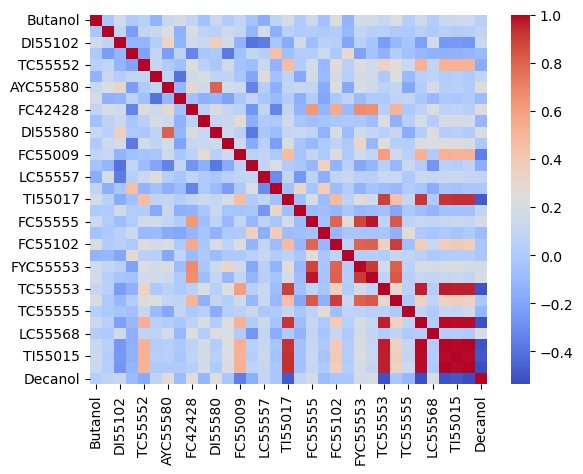

In [24]:
correlation_matrix = df_CDCO.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()
# Calculate and visualize correlations between numeric variables using a correlation matrix or heatmap.
# Identify strong positive/negative correlations.

In [25]:
strong_corr = correlation_matrix[abs(correlation_matrix) > 0.9

sns.heatmap(strong_corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

SyntaxError: '[' was never closed (2390085626.py, line 1)

In [ ]:

threshold = 0.9
correlation_matrix = df_CDCO.corr(numeric_only=True)
correlation_matrix = correlation_matrix[abs(correlation_matrix) > threshold].fillna(0)



fig = px.imshow(correlation_matrix, 
                color_continuous_scale='Viridis',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Matrix")

fig.update_xaxes(title_text='Features', side='bottom')
fig.update_layout(width=800, height=800)

fig.show()



In [ ]:
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)


In [ ]:
# Get indices of upper triangle where correlations are above threshold
indices = np.where((np.abs(correlation_matrix) > threshold) & (upper_triangle))

# Convert these indices to lists
rows, cols = indices[0].tolist(), indices[1].tolist()

# Construct pairs and fetch corresponding values 'DESCRIPTION'


data = []
correlation_id = 1  # Start the unique identifier for each correlation pair

for row, col in zip(rows, cols):
    # Ensure v1 is always lexicographically smaller than v2
    v1, v2 = sorted([correlation_matrix.columns[row], correlation_matrix.columns[col]])
    
    # Skip if this pair has already been processed
    if any(x[1] == v1 and x[2] == v2 for x in data):
        continue

    correlation_value = correlation_matrix.loc[v1, v2]
    
    # Fetch other required values for v1
    importance1 = FScore[FScore['Feature'] == v1]['Importance'].values[0] if not FScore[FScore['Feature'] == v1].empty else "N/A"
    DESCRIPTION1 = TagDesc[TagDesc['ID'] == v1]['DESCRIPTION'].values[0] if not TagDesc[TagDesc['ID'] == v1].empty else "####### UPDATE DESCRIPTION"
    
    # Fetch other required values for v2
    importance2 = FScore[FScore['Feature'] == v2]['Importance'].values[0] if not FScore[FScore['Feature'] == v2].empty else "N/A"
    DESCRIPTION2 = TagDesc[TagDesc['ID'] == v2]['DESCRIPTION'].values[0] if not TagDesc[TagDesc['ID'] == v2].empty else "####### UPDATE DESCRIPTION"
    
    # Append data for v1 and then v2
    data.append(['c' + str(correlation_id) + 'v1', v1, correlation_value, importance1, DESCRIPTION1])
    data.append(['c' + str(correlation_id) + 'v2', v2, correlation_value, importance2, DESCRIPTION2])
    
    correlation_id += 1  # Increment the identifier for the next unique correlation pair

final_df = pd.DataFrame(data, columns=['Pair_ID', 'Variable', 'Correlation', 'Importance', 'DESCRIPTION'])
print(final_df)


   Pair_ID Variable  Correlation  Importance                 DESCRIPTION
0     c1v1  FC55552     0.975047       117.0    ALK FD TO HYDR RX DC-551
1     c1v2  FC55555     0.975047       120.0  ####### UPDATE DESCRIPTION
2     c2v1  TI55013     0.917429        67.0    DC-551  HYDR RX SLURRY O
3     c2v2  TI55017     0.917429       117.0        FA-554 SLURRY OUTLET
4     c3v1  TI55015     0.928172        62.0     FA-552 1ST STG SEP BTMS
5     c3v2  TI55017     0.928172       117.0        FA-554 SLURRY OUTLET
6     c4v1  TI55014     0.926699        51.0    FA-553  1ST STG MIX DRUM
7     c4v2  TI55017     0.926699       117.0        FA-554 SLURRY OUTLET
8     c5v1  TI55016     0.931774        37.0       FA-551  2ND STG MIXER
9     c5v2  TI55017     0.931774       117.0        FA-554 SLURRY OUTLET
10    c6v1  TC55553     0.959613       107.0     DC-551 HYDR H2O PREHEAT
11    c6v2  TI55013     0.959613        67.0    DC-551  HYDR RX SLURRY O
12    c7v1  TC55553     0.959925       107.0     DC

In [ ]:
# Group by the first 3 characters of Pair_ID (i.e., cX) and sort within the groups by Importance
final_df['Group'] = final_df['Pair_ID'].str[:3]
sorted_df = final_df.groupby('Group').apply(lambda x: x.sort_values('Importance', ascending=False)).reset_index(drop=True)

# Drop the temporary 'Group' column
sorted_df.drop('Group', axis=1, inplace=True)

print(sorted_df)


   Pair_ID Variable  Correlation  Importance                 DESCRIPTION
0    c10v1  TI55013     0.982006        67.0    DC-551  HYDR RX SLURRY O
1    c10v2  TI55015     0.982006        62.0     FA-552 1ST STG SEP BTMS
2    c11v1  TI55013     0.988950        67.0    DC-551  HYDR RX SLURRY O
3    c11v2  TI55014     0.988950        51.0    FA-553  1ST STG MIX DRUM
4    c12v1  TI55013     0.983183        67.0    DC-551  HYDR RX SLURRY O
5    c12v2  TI55016     0.983183        37.0       FA-551  2ND STG MIXER
6    c13v2  TI55015     0.993561        62.0     FA-552 1ST STG SEP BTMS
7    c13v1  TI55014     0.993561        51.0    FA-553  1ST STG MIX DRUM
8    c14v1  TI55015     0.990403        62.0     FA-552 1ST STG SEP BTMS
9    c14v2  TI55016     0.990403        37.0       FA-551  2ND STG MIXER
10   c15v1  TI55014     0.996339        51.0    FA-553  1ST STG MIX DRUM
11   c15v2  TI55016     0.996339        37.0       FA-551  2ND STG MIXER
12    c1v2  FC55555     0.975047       120.0  #####

In [ ]:
sorted_df = final_df.sort_values(by='Correlation', ascending=False)
print(sorted_df)


   Pair_ID Variable  Correlation  Importance                 DESCRIPTION Group
29   c15v2  TI55016     0.996339        37.0       FA-551  2ND STG MIXER   c15
28   c15v1  TI55014     0.996339        51.0    FA-553  1ST STG MIX DRUM   c15
25   c13v2  TI55015     0.993561        62.0     FA-552 1ST STG SEP BTMS   c13
24   c13v1  TI55014     0.993561        51.0    FA-553  1ST STG MIX DRUM   c13
27   c14v2  TI55016     0.990403        37.0       FA-551  2ND STG MIXER   c14
26   c14v1  TI55015     0.990403        62.0     FA-552 1ST STG SEP BTMS   c14
21   c11v2  TI55014     0.988950        51.0    FA-553  1ST STG MIX DRUM   c11
20   c11v1  TI55013     0.988950        67.0    DC-551  HYDR RX SLURRY O   c11
23   c12v2  TI55016     0.983183        37.0       FA-551  2ND STG MIXER   c12
22   c12v1  TI55013     0.983183        67.0    DC-551  HYDR RX SLURRY O   c12
19   c10v2  TI55015     0.982006        62.0     FA-552 1ST STG SEP BTMS   c10
18   c10v1  TI55013     0.982006        67.0    DC-5

In [ ]:
sorted_df = final_df.sort_values(by='Importance', ascending=False)
print(sorted_df)

   Pair_ID Variable  Correlation  Importance                 DESCRIPTION Group
1     c1v2  FC55555     0.975047       120.0  ####### UPDATE DESCRIPTION   c1v
0     c1v1  FC55552     0.975047       117.0    ALK FD TO HYDR RX DC-551   c1v
3     c2v2  TI55017     0.917429       117.0        FA-554 SLURRY OUTLET   c2v
5     c3v2  TI55017     0.928172       117.0        FA-554 SLURRY OUTLET   c3v
7     c4v2  TI55017     0.926699       117.0        FA-554 SLURRY OUTLET   c4v
9     c5v2  TI55017     0.931774       117.0        FA-554 SLURRY OUTLET   c5v
12    c7v1  TC55553     0.959925       107.0     DC-551 HYDR H2O PREHEAT   c7v
16    c9v1  TC55553     0.959408       107.0     DC-551 HYDR H2O PREHEAT   c9v
10    c6v1  TC55553     0.959613       107.0     DC-551 HYDR H2O PREHEAT   c6v
14    c8v1  TC55553     0.968293       107.0     DC-551 HYDR H2O PREHEAT   c8v
20   c11v1  TI55013     0.988950        67.0    DC-551  HYDR RX SLURRY O   c11
18   c10v1  TI55013     0.982006        67.0    DC-5

In [ ]:
# If you want to save df_CDFI to a .csv file:
sorted_df.to_csv('sorted_df.csv', index=False)

### No CSV Output

Next page starts will all data inputs and uses only those below

LIMS data lables need to be refomatted to input style or they will be left out

In [ ]:
df_CDCO.columns
# Data Visualization:

# Create various plots (histograms, bar charts, scatter plots, etc.) to visualize the distribution of data and relationships between variables.
# Use libraries like Matplotlib or Seaborn for data visualization.

Index(['Butanol', '425 %Al', 'DI55152', 'FC55003', 'DI55102', 'FC55569',
       'AYC55580', 'FC42428', 'TC55552', 'FC55009', 'FC55576', 'FFC55553',
       'LC55553', 'LC55555', 'TC55555', 'TI55023', 'LC55557', 'FYC55553',
       'TI55021', 'FFC55555', 'FC55555', 'FC55552', 'DI55580', 'TI55017',
       'TC55553', 'FC55102', 'FC55152', 'LC55568', 'TI55013', 'TI55015',
       'TI55014', 'TI55016', 'Date', 'Decanol'],
      dtype='object')

In [ ]:
num_columns = df_CDCO.shape[1]
print("Number of features:", num_columns)

Number of features: 34
